In [5]:
import os
import cv2
import glob
import json

from torchvision.io import read_image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
from PIL import Image

In [63]:

def pil_loader(path: str) -> Image.Image:
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("RGB")

def plot_images(image, mask):
    """
    Plots images side by side of the original image, mask and the image with the mask applied
    """
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(image)
    ax[1].imshow(mask, cmap="gray")
    ax[2].imshow(image)
    ax[2].imshow(mask, alpha=0.4)
    ax[0].set_title("Original Image")
    ax[1].set_title("Mask")
    ax[2].set_title("Image with Mask")
    plt.show()

def plot_image(image):
    """
    Plots images side by side of the original image, mask and the image with the mask applied
    """
    plt.imshow(image)
   
    
    plt.show()
    




In [64]:
filetered_data_path = "/home/hashmat/Downloads/Coco_2017/filtered"
images_path = os.path.join(filetered_data_path, "images")
masks_path = os.path.join(filetered_data_path, "masks")


In [65]:
image_paths = glob.glob(os.path.join(images_path, "*.jpg"))


In [66]:
expansion_pixels = 20
for image_path in image_paths:
    mask_path = image_path.replace("images", "masks")
    image = pil_loader(image_path)
    mask = pil_loader(mask_path)
    mask_ = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    # Invert the mask
    #inverted_mask = cv2.bitwise_not(mask_)

    # Create a structuring element (kernel) for dilation
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * expansion_pixels + 1, 2 * expansion_pixels + 1))

    # Perform dilation on the inverted mask
    expanded_inverted_mask = cv2.dilate(mask_, kernel, iterations=1)

    # Invert the expanded mask back to get the desired result
    expanded_mask = cv2.bitwise_not(expanded_inverted_mask)
    break
    
    

In [68]:
plot_image(image, expanded_mask)

TypeError: plot_image() takes 1 positional argument but 2 were given

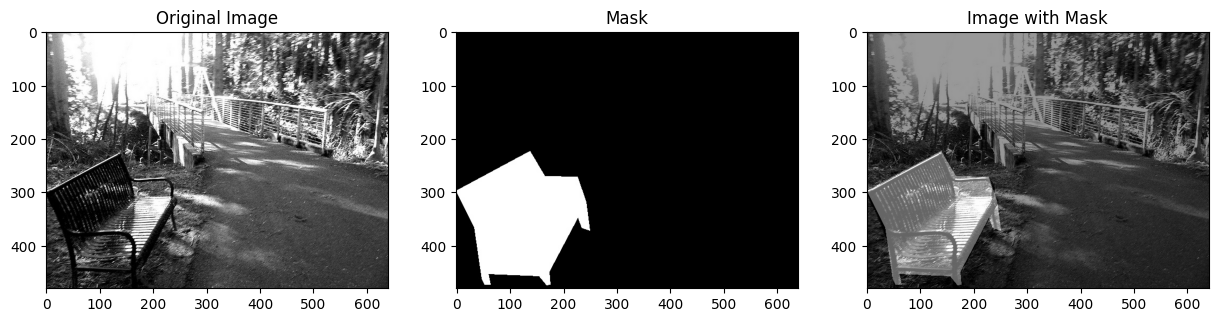

In [52]:
plot_images(image, mask)

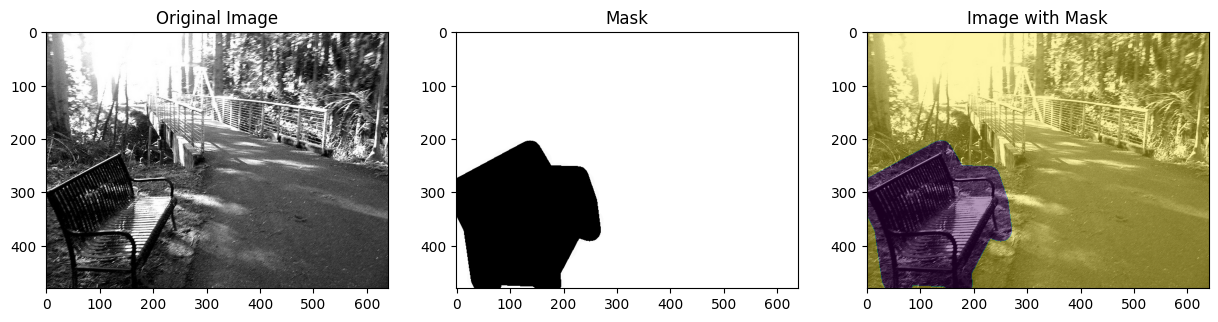

In [69]:
plot_images(image, expanded_mask)

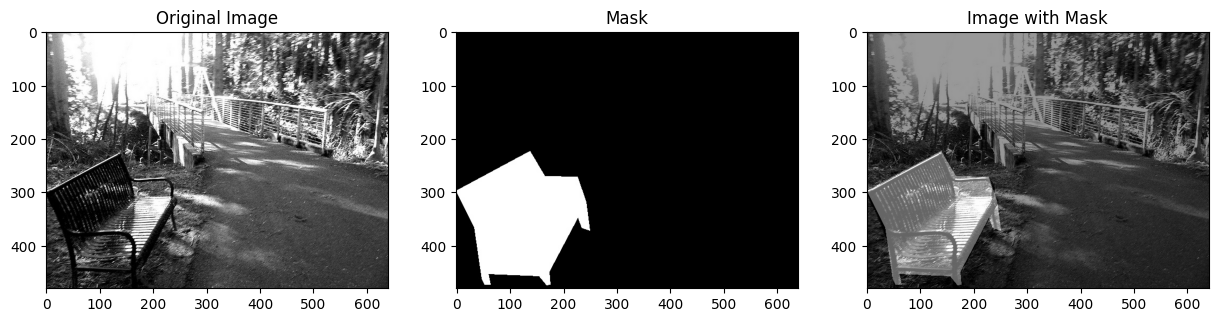

In [70]:
plot_images(image, mask)